Index(['review', 'label'], dtype='object')
Nama kolom: Index(['review', 'label'], dtype='object')
                                              review  label
0            Not bad sih, tapi banyak lecet di body.      0
1      Udah komplain tapi malah disuruh sabar terus.      0
2      Overall puas, cuma agak kecewa sama kurirnya.      1
3       Pakai sebentar langsung mati, sayang banget.      0
4  Sudah dicoba, berfungsi baik walau instruksi k...      1
Akurasi: 95.83%

Classification Report:
              precision    recall  f1-score   support

     Negatif       1.00      0.92      0.96        63
     Positif       0.92      1.00      0.96        57

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Confusion Matrix:
[[58  5]
 [ 0 57]]


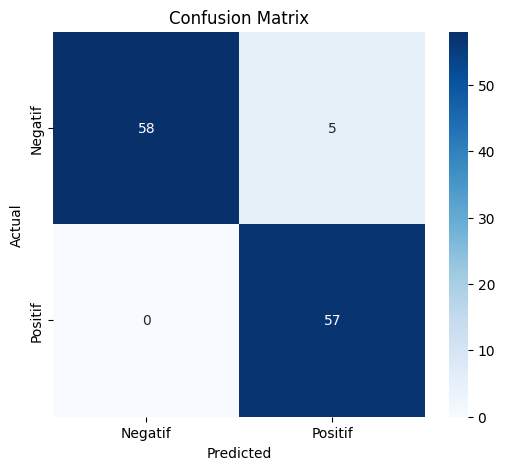

In [2]:
# 1. Import Library
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:/Users/HP CAMO/Downloads/review_penjualan_online_realistis_biner.csv")

# Lihat nama kolom
print(df.columns)  # pastikan nama kolomnya benar, seperti 'review' dan 'label'

# Pisahkan fitur dan label
X = df['review'].values     # ← perhatikan huruf kecil
y = df['label'].values



X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 4. Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

X_train_clean = [clean_text(text) for text in X_train_raw]
X_test_clean = [clean_text(text) for text in X_test_raw]

# 3. Tampilkan nama kolom dan data awal
print("Nama kolom:", df.columns)
print(df.head())

# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test_clean)

# 6. Train Model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 7. Prediksi
y_pred = model.predict(X_test_vec)

# 8. Evaluasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 9. Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif','Positif'], yticklabels=['Negatif','Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()